In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import timedelta
from dateutil import parser
from datetime import datetime
%matplotlib inline
dir_name='model3'

In [2]:
"""
读取数据
"""

economic_df = pd.read_csv('C:\Alex_Code\quant_competetion-final\data\economic_indicator.csv', 
                          encoding='utf-8-sig', index_col='DateTime')
economic_df.index=economic_df.index.map(lambda x:str(x)[:-3])
economic_df.index = pd.DatetimeIndex(economic_df.index)
index1='CPI当月同比'
index2='工业增加值当月同比'
economic_df = economic_df[[index1, index2]]

In [3]:
"""
计算每个月的趋势
"""

economic_df['cpi_trend']= 'up'
economic_df['growth_trend']= 'down'
month=4

for  i in range(0, economic_df.__len__() - month):
    if economic_df.iloc[i][index1]>economic_df.iloc[i + 1][index1] and economic_df.iloc[i + 1][index1]>economic_df.iloc[i + 2][index1] and \
        economic_df.iloc[i + 2][index1] > economic_df.iloc[i + 3][index1] :
        economic_df.ix[i, 'cpi_trend']= 'down'
        continue

    if economic_df.iloc[i][index1]<economic_df.iloc[i + 1][index1] and economic_df.iloc[i + 1][index1]<economic_df.iloc[i + 2][index1] and \
        economic_df.iloc[i + 2][index1] < economic_df.iloc[i + 3][index1] :
        economic_df.ix[i, 'cpi_trend']= 'up'
        continue

    if economic_df.iloc[i][index1]>max(economic_df.iloc[i + 1][index1], economic_df.iloc[i + 2][index1] , economic_df.iloc[i + 3][index1]) \
        and economic_df.iloc[i + month][index1]<min(economic_df.iloc[i + 1][index1], economic_df.iloc[i + 2][index1] , economic_df.iloc[i + 3][index1]):
        economic_df.ix[i, 'cpi_trend']= 'down'
        continue

    if economic_df.iloc[i][index1] < min(economic_df.iloc[i + 1][index1], economic_df.iloc[i + 2][index1], economic_df.iloc[i + 3][index1]) \
            and economic_df.iloc[i + month][index1] > max(economic_df.iloc[i + 1][index1], economic_df.iloc[i + 2][index1], economic_df.iloc[i + 3][index1]):
        economic_df.ix[i, 'cpi_trend'] = 'up'
        continue
    economic_df.ix[i, 'cpi_trend']=economic_df.iloc[i - 1]['cpi_trend']

for  i in range(0, economic_df.__len__() - month):
    if economic_df.iloc[i][index2]>economic_df.iloc[i + 1][index2] and economic_df.iloc[i + 1][index2]>economic_df.iloc[i + 2][index2] and \
        economic_df.iloc[i + 2][index2] > economic_df.iloc[i + 3][index2] :
        economic_df.ix[i, 'growth_trend']= 'down'
        continue

    if economic_df.iloc[i][index2]<economic_df.iloc[i + 1][index2] and economic_df.iloc[i + 1][index2]<economic_df.iloc[i + 2][index2] and \
        economic_df.iloc[i + 2][index2] < economic_df.iloc[i + 3][index2] :
        economic_df.ix[i, 'growth_trend']= 'up'
        continue

    if economic_df.iloc[i][index2]>max(economic_df.iloc[i + 1][index2], economic_df.iloc[i + 2][index2] , economic_df.iloc[i + 3][index2]) \
        and economic_df.iloc[i + month][index2]<min(economic_df.iloc[i + 1][index2], economic_df.iloc[i + 2][index2] , economic_df.iloc[i + 3][index2]):
        economic_df.ix[i, 'growth_trend']= 'down'
        continue

    if economic_df.iloc[i][index2] < min(economic_df.iloc[i + 1][index2], economic_df.iloc[i + 2][index2], economic_df.iloc[i + 3][index2]) \
            and economic_df.iloc[i + month][index2] > max(economic_df.iloc[i + 1][index2], economic_df.iloc[i + 2][index2], economic_df.iloc[i + 3][index2]):
        economic_df.ix[i, 'growth_trend'] = 'up'
        continue
    economic_df.ix[i, 'growth_trend']=economic_df.iloc[i - 1]['growth_trend']

economic_df['trend']= ''

for  i in range(0, economic_df.__len__() - month):
    if economic_df.ix[i, 'growth_trend']== 'up':
        if economic_df.ix[i, 'cpi_trend']== 'up':
            economic_df.ix[i, 'trend']= '过热'
        else:
            economic_df.ix[i, 'trend'] = '复苏'
    else:
        if economic_df.ix[i, 'cpi_trend']== 'up':
            economic_df.ix[i, 'trend']= '滞涨'
        else:
            economic_df.ix[i, 'trend'] = '衰退'

economic_df[['cpi_trend','growth_trend','trend']].to_csv('./'+dir_name+'/trends.csv',encoding='utf-8-sig')

C:\Alex_Work\anaconda3\lib\site-packages\ipykernel_launcher.py:25: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
C:\Alex_Work\anaconda3\lib\site-packages\ipykernel_launcher.py:15: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  from ipykernel import kernelapp as app
C:\Alex_Work\anaconda3\lib\site-packages\ipykernel_launcher.py:19: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
C:\Alex_Work\anaconda3\lib\site-packages\ipykernel_launcher.py:23: DeprecationWa

C:\Alex_Work\anaconda3\lib\site-packages\ipykernel_launcher.py:43: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
C:\Alex_Work\anaconda3\lib\site-packages\ipykernel_launcher.py:29: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
C:\Alex_Work\anaconda3\lib\site-packages\ipykernel_launcher.py:33: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
C:\Alex_Work\anaconda3\lib\site-packages\ipykernel_launcher.py:41: DeprecationWarning: 
.ix is deprecated. Please use
.lo

C:\Alex_Work\anaconda3\lib\site-packages\ipykernel_launcher.py:48: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
C:\Alex_Work\anaconda3\lib\site-packages\ipykernel_launcher.py:54: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
C:\Alex_Work\anaconda3\lib\site-packages\ipykernel_launcher.py:55: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
C:\Alex_Work\anaconda3\lib\site-packages\ipykernel_launcher.py:57: DeprecationWarning: 
.ix is deprecated. Please use
.lo

In [44]:
"""
计算时钟周期
"""
df=economic_df[['cpi_trend','growth_trend','trend']]
df=df[:'2014']
periods=pd.DataFrame({'start': '', 'end': '', 'trend': ''}, index=[0])

id=0
temp_trend=df.ix[0,'trend']
temp_start_time=df.index[0]
temp_end_time=df.index[0]

for i in range(df.__len__()):
    if df.ix[i,'trend']!=temp_trend:
        temp_end_time=df.index[i-1]
        periods=periods.append(pd.DataFrame({'start':temp_start_time.date(), 'end':temp_end_time.date(), 'trend':temp_trend}, index=[i]))
        temp_start_time = df.index[i]
        temp_trend=df.ix[i,'trend']
temp_end_time = df.index[ - 1]
periods = periods.append(
    pd.DataFrame({'start': temp_start_time.date(), 'end': temp_end_time.date(), 'trend': temp_trend}, index=[i]))

periods.index=pd.Series(list(range(periods.__len__())))
periods.index.name='id'
periods.drop(index=0,inplace=True)
from dateutil.relativedelta import relativedelta
periods['end'] = periods['end'].map(lambda  x:(x+relativedelta(months=1)-relativedelta(days=x.day)))

periods.to_csv('./'+dir_name+'/periods-2014.csv',encoding='utf-8-sig')


C:\Alex_Work\anaconda3\lib\site-packages\ipykernel_launcher.py:9: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  if __name__ == '__main__':
C:\Alex_Work\anaconda3\lib\site-packages\ipykernel_launcher.py:14: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  
C:\Alex_Work\anaconda3\lib\site-packages\ipykernel_launcher.py:18: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated


In [4]:
"""
计算收益排行
"""
from WindPy import *
def get_wind_data(start, end):
    df=w.wss("801011.SI,801012.SI,801013.SI,801014.SI,801015.SI,801016.SI,801017.SI,801018.SI,801021.SI,801022.SI,801023.SI,801024.SI,801032.SI,801033.SI,801034.SI,801035.SI,801036.SI,801037.SI,801041.SI,801051.SI,801053.SI,801054.SI,801055.SI,801072.SI,801073.SI,801074.SI,801075.SI,801076.SI,801081.SI,801082.SI,801083.SI,801084.SI,801085.SI,801092.SI,801093.SI,801094.SI,801101.SI,801102.SI,801111.SI,801112.SI,801123.SI,801124.SI,801131.SI,801132.SI,801141.SI,801142.SI,801143.SI,801151.SI,801152.SI,801153.SI,801154.SI,801155.SI,801156.SI,801161.SI,801162.SI,801163.SI,801164.SI,801171.SI,801172.SI,801173.SI,801174.SI,801175.SI,801176.SI,801177.SI,801178.SI,801181.SI,801182.SI,801191.SI,801192.SI,801193.SI,801194.SI,801202.SI,801203.SI,801204.SI,801205.SI,801211.SI,801212.SI,801213.SI,801214.SI,801215.SI,801222.SI,801223.SI,801231.SI,801711.SI,801712.SI,801713.SI,801721.SI,801722.SI,801723.SI,801724.SI,801725.SI,801731.SI,801732.SI,801733.SI,801734.SI,801741.SI,801742.SI,801743.SI,801744.SI,801751.SI,801752.SI,801761.SI,801881.SI",
             "pct_chg_per,sec_name","startDate="+start+";endDate="+end,usedf=True)[1]
    df=df.set_index('SEC_NAME')
    df.columns=[start+'-'+end]
    df.index.name='code'
    return df

In [5]:
def get_paiming(df=pd.DataFrame([]),trend=''):
    # print(trend,df)
    number_of_time = df.__len__()
    dff=pd.DataFrame()
    for i in range(number_of_time):
        start_time = df.iloc[i]['start']
        end_time = df.iloc[i]['end']
        dff=dff.join(get_wind_data(start_time,end_time),how='right')

    df.dropna(inplace=True)
    # dff = dff[dff.index.map(int) > 2000012551000000]
    dff.to_csv('./'+dir_name+'/'+trend+'.csv',encoding='utf-8-sig')
    return []

In [21]:

w.start()
ZHOUQI = ['复苏', '过热', '滞涨', '衰退']
rank = periods
rank = rank.sort_values('trend')
# rank['start']=rank['start'].map(str)
# rank['end']=rank['end'].map(str)
# rank['start']=rank['start'].map(parser.parse)
# rank['end']=rank['end'].map(parser.parse)
rank['start'] = rank['start'].map(lambda  x:x.strftime('%Y%m%d'))
rank['end'] = rank['end'].map(lambda  x:x.strftime('%Y%m%d'))
for trend in ZHOUQI:
    get_paiming(rank[rank['trend'] ==trend],trend)
w.close()

Welcome to use Wind Quant API for Python (WindPy)!

COPYRIGHT (C) 2017 WIND INFORMATION CO., LTD. ALL RIGHTS RESERVED.
IN NO CIRCUMSTANCE SHALL WIND BE RESPONSIBLE FOR ANY DAMAGES OR LOSSES CAUSED BY USING WIND QUANT API FOR Python.


C:\Alex_Work\anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


In [6]:
"""
按照收益率综合排序
"""
ZHOUQI = [['复苏'], ['过热'], ['滞涨'], ['衰退']]
ZHOUQI = np.array(ZHOUQI)

for line in ZHOUQI:
    trend = line[0]

    df = pd.read_csv('./'+dir_name+'/'+str(trend)+'.csv', encoding='utf-8-sig',index_col='code',engine='python')
    df['total_return_rate'] = 0
    df=df.dropna()
    for i in range(df.__len__()):
        df['total_return_rate'].iloc[i] = df.iloc[i,1:].values.sum()
    df=df.sort_values('total_return_rate',ascending=False)
    df=df[df.columns.sort_values()]
    df.to_csv('./'+dir_name+'/'+str(trend)+'_sort.csv',encoding='utf-8-sig')


In [18]:
"""
按照收益排名排序
"""
ZHOUQI = [['复苏'], ['过热'], ['滞涨'], ['衰退']]
ZHOUQI = np.array(ZHOUQI)

for line in ZHOUQI:
    trend = line[0]
    df = pd.read_csv('./'+dir_name+'/'+str(trend)+'.csv', encoding='utf-8-sig',index_col='code',engine='python')
    df['total_return_rate'] = 0
    df.dropna(inplace=True)
    df['rank']=0
    for i in df.columns:
        if i in ('rank','total_return_rate'):
            continue
        df=df.sort_values(i,ascending=False)
        df[i+'_rank']=df.reset_index().index
        df['rank']+=df[i+'_rank']
    df=df.sort_values('rank')
    df.to_csv('./'+dir_name+'/'+str(trend)+'_sort.csv',encoding='utf-8-sig')


In [8]:
def trade_model1(df_to_today, today, money, cash, portfolio):
    df_to_today.loc[today]
    df = pd.read_csv('./'+dir_name+'/trends.csv', encoding='utf-8-sig', index_col='DateTime')
    df.index = df.index.map(lambda x: x[:-3])
    trend = df.loc[today.strftime('%Y')+'-'+today.strftime('%m')]['trend']

    df = pd.read_csv('./'+ dir_name+'/' + trend + '_sort.csv', encoding='utf-8-sig', engine='python',
                     index_col='code')
    targets = [df.index[0], df.index[1]]
    df=pd.read_csv('./data/code_to_name.csv',engine='python',encoding='utf-8-sig',index_col='SEC_NAME')

    for obj,share in portfolio.items():
        cash+=df_to_today[df.loc[obj]['code']][-1]*share

    portfolio={}

    cash_share=(cash / targets.__len__())
    for target in targets:

        if pd.notna(df_to_today[df.loc[target]['code']][-1]):
            portfolio[target]=cash_share/df_to_today[df.loc[target]['code']][-1]
            cash-=cash_share

    money=cash

    for key,value in portfolio.items():
        money+=df_to_today[df.loc[key]['code']][-1]*value

    # print(today, money, cash, portfolio)
    return money, cash, portfolio

def trade_model2_3month(df_to_today, today, money, cash, portfolio):
    df_to_today.loc[today]
    df = pd.read_csv('./'+dir_name+'/trends.csv', encoding='utf-8-sig', index_col='DateTime')
    df.index = df.index.map(lambda x: x[:-3])
    trend = df.loc[(today-relativedelta(months=3)).strftime('%Y')+'-'+(today-relativedelta(months=3)).strftime('%m')]['trend']

    df = pd.read_csv('./'+ dir_name+'/' + trend + '_sort.csv', encoding='utf-8-sig', engine='python',
                     index_col='code')
    targets = [df.index[0], df.index[1]]
    df=pd.read_csv('./data/code_to_name.csv',engine='python',encoding='utf-8-sig',index_col='SEC_NAME')

    for obj,share in portfolio.items():
        cash+=df_to_today[df.loc[obj]['code']][-1]*share

    portfolio={}

    cash_share=(cash / targets.__len__())
    for target in targets:

        if pd.notna(df_to_today[df.loc[target]['code']][-1]):
            portfolio[target]=cash_share/df_to_today[df.loc[target]['code']][-1]
            cash-=cash_share

    money=cash

    for key,value in portfolio.items():
        money+=df_to_today[df.loc[key]['code']][-1]*value

    # print(today, money, cash, portfolio)
    return money, cash, portfolio


In [10]:
import back_test
from dateutil.relativedelta import relativedelta
close_df = pd.read_csv('./data/index_close.csv', encoding='utf-8-sig',index_col='DateTime')
close_df.index=pd.DatetimeIndex(close_df.index)
backtest1 = back_test.back_test_system(close_df, 'hs300', save_dir='./back_test/')
df=backtest1.back_test_by_day('lundong',trade_model1,'20140101','20180629')
df=backtest1.back_test_by_day('lundong_3month',trade_model2_3month,'20140101','20180629')

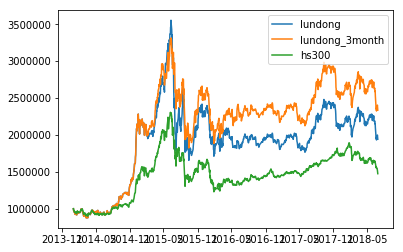

In [11]:
backtest1.show(df,['lundong','lundong_3month'])

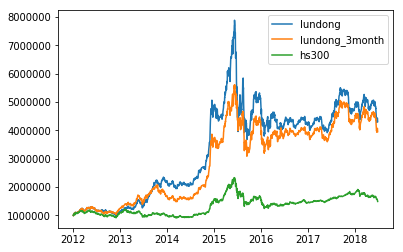

In [41]:
backtest1.show(df,['lundong','lundong_3month'])